<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/random_generate_with_a_lookup_table_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
pd.options.display.float_format = '{:.5f}'.format
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [ ]:
from scipy.stats import norm

In [ ]:
prob=0.001
keys=np.array([x for x in np.arange(0,1+prob,prob)])
keys=np.clip(keys, a_min=1e-4, a_max=1-(1e-16))

bins=np.digitize(keys, keys )
values=np.array([norm.ppf(x) for x in keys])
norm_inv={ bins : v for bins, v in zip(bins, values)}
print(len(bins))
# norm_inv

1001


In [ ]:
print(norm_inv[1], '\t', norm_inv[len(bins)])

-3.7190164854556804 	 8.209536151601387


In [ ]:
%time x=np.random.rand(20000)
%time inds = np.digitize(x, keys)
%time sample=pd.DataFrame(np.c_[x,inds], columns=['probs','bins'])
%time sample['values']=sample['bins'].map(norm_inv)

%time y=np.random.randn(20000)
%time sample['y']=y

CPU times: user 284 µs, sys: 47 µs, total: 331 µs
Wall time: 342 µs
CPU times: user 1.83 ms, sys: 0 ns, total: 1.83 ms
Wall time: 1.84 ms
CPU times: user 987 µs, sys: 0 ns, total: 987 µs
Wall time: 992 µs
CPU times: user 4.92 ms, sys: 1.89 ms, total: 6.81 ms
Wall time: 7.97 ms
CPU times: user 870 µs, sys: 0 ns, total: 870 µs
Wall time: 874 µs
CPU times: user 489 µs, sys: 29 µs, total: 518 µs
Wall time: 524 µs


In [ ]:
sample[sample['values'].isnull()]

,probs,bins,values,y
2367,0.00002,0.00000,nan,0.25547
8355,0.00006,0.00000,nan,1.42759
15368,0.00001,0.00000,nan,0.37415


In [ ]:
sample[['values','y']].describe()

,values,y
count,19997.00000,20000.00000
mean,0.00615,-0.00295
std,0.99474,0.99625
min,-3.71902,-3.87486
25%,-0.65884,-0.67962
50%,0.00000,-0.00824
75%,0.67764,0.67157
max,3.09023,4.01676


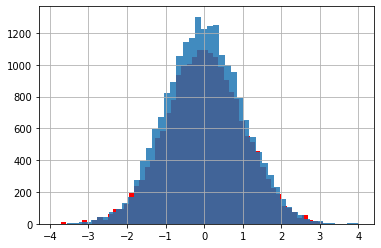

In [ ]:
sample['values'].hist(bins=50, color='red')
sample['y'].hist(bins=50, alpha=0.85)

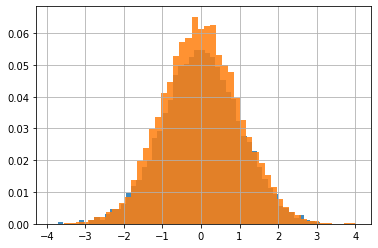

In [ ]:
# sample['y'].hist(bins=50, weights=np.ones_like(sample.index)/len(sample.index))

df_plot=sample[~sample['values'].isnull()].copy()
df_plot['values'].hist(bins=50, weights=np.ones_like(df_plot.index)/len(df_plot.values), alpha=0.85)
# plt.show()
df_plot['y'].hist(bins=50, weights=np.ones_like(df_plot.index)/len(df_plot.y), alpha=0.85)

# sample['values'].hist(bins=50,weights=np.ones_like(sample.index)/len(sample.index))

In [ ]:
df_quantiles=pd.DataFrame()
for x in np.arange(0,1+0.01,0.01):
  temp=sample.quantile(q=x, axis=0).to_frame().T
  temp['x']=x
  df_quantiles=df_quantiles.append(temp)

df_quantiles= df_quantiles.reset_index(drop=True)

In [ ]:
df_quantiles

,probs,bins,values,y,x
0,0.00001,0.00000,-3.71902,-3.87486,0.00000
1,0.01035,11.00000,-2.32635,-2.31443,0.01000
2,0.02044,21.00000,-2.05375,-2.03164,0.02000
3,0.03057,31.00000,-1.88079,-1.83068,0.03000
4,0.04123,42.00000,-1.73920,-1.70576,0.04000
...,...,...,...,...,...
96,0.96054,961.00000,1.75069,1.75935,0.96000
97,0.96968,970.00000,1.86630,1.87146,0.97000
98,0.97909,980.00000,2.03352,2.03054,0.98000
99,0.98975,990.00000,2.29037,2.31047,0.99000


In [ ]:
df_quantiles.describe()

,probs,bins,values,y,x
count,101.00000,101.00000,101.00000,101.00000,101.00000
mean,0.50243,502.90406,0.00085,-0.00151,0.50000
std,0.29208,292.11484,1.06675,1.10290,0.29300
min,0.00001,0.00000,-3.71902,-3.87486,0.00000
25%,0.25545,256.00000,-0.65884,-0.67962,0.25000
50%,0.50077,501.00000,0.00000,-0.00824,0.50000
75%,0.75153,752.00000,0.67764,0.67157,0.75000
max,0.99995,1000.00000,3.09023,4.01676,1.00000


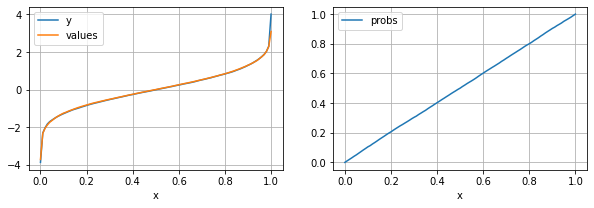

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
df_quantiles.plot(ax=ax[0],x='x', y='y', kind='line', grid=True)
df_quantiles.plot(ax=ax[0],x='x', y='values', kind='line',grid=True)

df_quantiles.plot(ax=ax[1],x='x', y='probs', kind='line', grid=True)


In [ ]:
%time x=np.random.rand(2000000)
%time inds = np.digitize(x, bins)
%time sample=pd.DataFrame(np.c_[x,inds], columns=['prob','bins'])

CPU times: user 31.4 ms, sys: 5.95 ms, total: 37.3 ms
Wall time: 37.9 ms
CPU times: user 40.3 ms, sys: 13 ms, total: 53.2 ms
Wall time: 79.9 ms
CPU times: user 15.8 ms, sys: 43 ms, total: 58.9 ms
Wall time: 74.4 ms


CPU times: user 122 ms, sys: 63 ms, total: 185 ms
Wall time: 198 ms


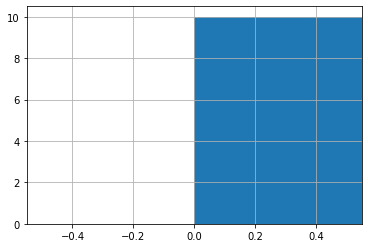

In [ ]:
%time sample['bins'].hist(bins=10, width=0.8, density=True)

CPU times: user 133 ms, sys: 33.7 ms, total: 167 ms
Wall time: 243 ms


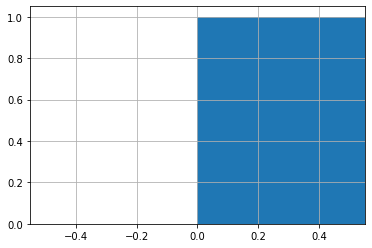

In [ ]:
%time sample['bins'].hist(bins=10, width=0.8, weights =np.ones_like(sample.index) / len(sample.index))